# An Implementation of Deep Q With Expercience Replay

In [13]:
import gym
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers
import tensorflow as tf
%load_ext tensorboard
import random
import time
%matplotlib inline
import matplotlib.pyplot as plt

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [14]:
env = gym.make("Breakout-ram-v0")
env = gym.wrappers.Monitor(env, "recording",
                           video_callable= lambda x:x % 20 == 0,
                          force=True)
INPUT_SHAPE = env.observation_space.shape
print(INPUT_SHAPE)
NUM_ACTIONS = env.action_space.n
print(NUM_ACTIONS)

(128,)
4


In [15]:

def createRamModel(): 
    
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, activation='relu',input_shape=INPUT_SHAPE))
    # output is the same size as number of outputs
    model.add(layers.Dense(70,activation='relu'))
    model.add(layers.Dense(60,activation='relu'))
    model.add(layers.Dense(40,activation='relu'))

    model.add(layers.Dense(NUM_ACTIONS,activation='linear'))
    model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='mse',       # mean squared error
              metrics=['mae'])  # mean absolute error
    return model


training_model = createRamModel()
target_model = createRamModel()
target_model.set_weights(training_model.get_weights())

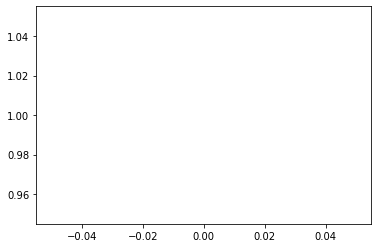

training 0.96059601
1/1 [==============================] - 0s 1ms/step - loss: 1122.5303 - mae: 13.8451
training 0.96059601
1/1 [==============================] - 0s 2ms/step - loss: 13808.8145 - mae: 48.4074
training 0.96059601
1/1 [==============================] - 0s 2ms/step - loss: 5389.7290 - mae: 29.3097
training 0.96059601
1/1 [==============================] - 0s 5ms/step - loss: 19907.9961 - mae: 61.9176
training 0.96059601
1/1 [==============================] - 0s 1ms/step - loss: 80902.2031 - mae: 127.8016
training 0.96059601
1/1 [==============================] - 0s 1ms/step - loss: 102908.0469 - mae: 139.1658
training 0.96059601
1/1 [==============================] - 0s 1ms/step - loss: 18065.1973 - mae: 56.3019
training 0.96059601
1/1 [==============================] - 0s 2ms/step - loss: 191712.4062 - mae: 183.0362
training 0.96059601
1/1 [==============================] - 0s 2ms/step - loss: 231233.7812 - mae: 189.1891
training 0.96059601
1/1 [=========================

1/1 [==============================] - 0s 3ms/step - loss: 15884498.0000 - mae: 1654.4663
training 0.96059601
1/1 [==============================] - 0s 2ms/step - loss: 14154104.0000 - mae: 1488.6926
training 0.96059601
1/1 [==============================] - 0s 2ms/step - loss: 14510280.0000 - mae: 1587.7424
training 0.96059601
1/1 [==============================] - 0s 3ms/step - loss: 11839716.0000 - mae: 1359.9263
training 0.96059601
1/1 [==============================] - 0s 4ms/step - loss: 14427590.0000 - mae: 1598.5618
training 0.96059601
1/1 [==============================] - 0s 3ms/step - loss: 15715282.0000 - mae: 1613.5566
training 0.96059601
1/1 [==============================] - 0s 4ms/step - loss: 8835090.0000 - mae: 1242.2122
training 0.96059601
1/1 [==============================] - 0s 3ms/step - loss: 8098435.5000 - mae: 1121.2281
training 0.96059601
1/1 [==============================] - 0s 4ms/step - loss: 9449458.0000 - mae: 1250.4292
training 0.96059601
1/1 [========

1/1 [==============================] - 0s 1ms/step - loss: 1666826.2500 - mae: 490.7576
training 0.96059601
1/1 [==============================] - 0s 2ms/step - loss: 1691878.1250 - mae: 528.4092
training 0.96059601
1/1 [==============================] - 0s 2ms/step - loss: 2044864.6250 - mae: 531.9203
training 0.96059601
1/1 [==============================] - 0s 1ms/step - loss: 2285157.0000 - mae: 613.2330
training 0.96059601
1/1 [==============================] - 0s 1ms/step - loss: 2678158.0000 - mae: 661.3494
training 0.96059601
1/1 [==============================] - 0s 2ms/step - loss: 1194906.2500 - mae: 436.7012
training 0.96059601
1/1 [==============================] - 0s 2ms/step - loss: 1217291.0000 - mae: 448.3392
training 0.96059601
1/1 [==============================] - 0s 1ms/step - loss: 2158071.5000 - mae: 559.0220
training 0.96059601
1/1 [==============================] - 0s 2ms/step - loss: 1633483.5000 - mae: 475.8654
training 0.96059601
1/1 [=======================

1/1 [==============================] - 0s 3ms/step - loss: 1001768.0625 - mae: 388.3987
training 0.96059601
1/1 [==============================] - 0s 3ms/step - loss: 1310685.0000 - mae: 434.0882
training 0.96059601
1/1 [==============================] - 0s 3ms/step - loss: 1042823.1250 - mae: 393.6036
training 0.96059601
1/1 [==============================] - 0s 3ms/step - loss: 975251.8750 - mae: 384.9691
training 0.96059601
1/1 [==============================] - 0s 3ms/step - loss: 800946.0000 - mae: 359.7991
training 0.96059601
1/1 [==============================] - 0s 3ms/step - loss: 829208.6250 - mae: 366.0644
training 0.96059601
1/1 [==============================] - 0s 3ms/step - loss: 863587.3750 - mae: 389.6469
training 0.96059601
1/1 [==============================] - 0s 5ms/step - loss: 808650.8750 - mae: 354.8625
training 0.96059601
1/1 [==============================] - 0s 6ms/step - loss: 836446.0000 - mae: 344.2478
training 0.96059601
1/1 [=============================

1/1 [==============================] - 0s 1ms/step - loss: 623563.5625 - mae: 298.7022
training 0.9509900498999999
1/1 [==============================] - 0s 2ms/step - loss: 353653.6875 - mae: 236.6925
training 0.9509900498999999
1/1 [==============================] - 0s 3ms/step - loss: 622159.1250 - mae: 296.7205
training 0.9509900498999999
1/1 [==============================] - 0s 3ms/step - loss: 679932.1250 - mae: 314.4694
training 0.9509900498999999
1/1 [==============================] - 0s 3ms/step - loss: 586302.0000 - mae: 275.6509
training 0.9509900498999999
1/1 [==============================] - 0s 2ms/step - loss: 493199.9375 - mae: 292.1519
training 0.9509900498999999
1/1 [==============================] - 0s 2ms/step - loss: 872951.8750 - mae: 362.6811
training 0.9509900498999999
1/1 [==============================] - 0s 2ms/step - loss: 760436.0000 - mae: 331.0800
training 0.9509900498999999
1/1 [==============================] - 0s 4ms/step - loss: 427144.5000 - mae: 23

1/1 [==============================] - 0s 1ms/step - loss: 561365.4375 - mae: 305.8240
training 0.9509900498999999
1/1 [==============================] - 0s 1ms/step - loss: 428890.1250 - mae: 240.5572
training 0.9509900498999999
1/1 [==============================] - 0s 2ms/step - loss: 583628.7500 - mae: 303.0588
training 0.9509900498999999
1/1 [==============================] - 0s 2ms/step - loss: 514453.1250 - mae: 279.5262
training 0.9509900498999999
1/1 [==============================] - 0s 1ms/step - loss: 541736.2500 - mae: 309.7074
training 0.9509900498999999
1/1 [==============================] - 0s 1ms/step - loss: 422798.6875 - mae: 247.2008
training 0.9509900498999999
1/1 [==============================] - 0s 1ms/step - loss: 373463.7500 - mae: 255.8931
training 0.9509900498999999
1/1 [==============================] - 0s 1ms/step - loss: 304303.4062 - mae: 228.3387
training 0.9509900498999999
1/1 [==============================] - 0s 1ms/step - loss: 396297.8750 - mae: 23

1/1 [==============================] - 0s 5ms/step - loss: 396763.0625 - mae: 243.4787
training 0.9509900498999999
1/1 [==============================] - 0s 5ms/step - loss: 312009.7500 - mae: 211.0560
training 0.9509900498999999
1/1 [==============================] - 0s 3ms/step - loss: 315927.5000 - mae: 208.7111
training 0.9509900498999999
1/1 [==============================] - 0s 3ms/step - loss: 405667.3750 - mae: 235.4890
training 0.9509900498999999
1/1 [==============================] - 0s 4ms/step - loss: 318600.7500 - mae: 211.4848
training 0.9509900498999999
1/1 [==============================] - 0s 3ms/step - loss: 303490.2188 - mae: 209.9951
training 0.9509900498999999
1/1 [==============================] - 0s 2ms/step - loss: 331772.2188 - mae: 220.9134
training 0.9509900498999999
1/1 [==============================] - 0s 1ms/step - loss: 442515.8438 - mae: 260.7148
training 0.9509900498999999
1/1 [==============================] - 0s 2ms/step - loss: 276345.9062 - mae: 21

1/1 [==============================] - 0s 3ms/step - loss: 376272.7188 - mae: 243.2153
training 0.9414801494009999
1/1 [==============================] - 0s 2ms/step - loss: 263250.5000 - mae: 201.2994
training 0.9414801494009999
1/1 [==============================] - 0s 2ms/step - loss: 178965.1250 - mae: 159.7605
training 0.9414801494009999
1/1 [==============================] - 0s 2ms/step - loss: 372122.9375 - mae: 232.6434
training 0.9414801494009999
1/1 [==============================] - 0s 2ms/step - loss: 326223.5625 - mae: 213.4613
training 0.9414801494009999
1/1 [==============================] - 0s 2ms/step - loss: 268845.1562 - mae: 207.8134
training 0.9414801494009999
1/1 [==============================] - 0s 2ms/step - loss: 169152.2500 - mae: 150.2898
training 0.9414801494009999
1/1 [==============================] - 0s 4ms/step - loss: 202406.0469 - mae: 175.2018
training 0.9414801494009999
1/1 [==============================] - 0s 2ms/step - loss: 164543.2656 - mae: 15

1/1 [==============================] - 0s 4ms/step - loss: 317764.3125 - mae: 219.1116
training 0.9414801494009999
1/1 [==============================] - 0s 1ms/step - loss: 219682.8750 - mae: 170.1318
training 0.9414801494009999
1/1 [==============================] - 0s 2ms/step - loss: 184057.8438 - mae: 176.7726
training 0.9414801494009999
1/1 [==============================] - 0s 1ms/step - loss: 101434.1094 - mae: 128.6380
training 0.9414801494009999
1/1 [==============================] - 0s 1ms/step - loss: 190715.3438 - mae: 162.2826
training 0.9414801494009999
1/1 [==============================] - 0s 1ms/step - loss: 261257.7969 - mae: 204.1606
training 0.9414801494009999
1/1 [==============================] - 0s 1ms/step - loss: 144791.0000 - mae: 150.6549
training 0.9414801494009999
1/1 [==============================] - 0s 2ms/step - loss: 247856.8438 - mae: 198.3100
training 0.9414801494009999
1/1 [==============================] - 0s 1ms/step - loss: 246526.5312 - mae: 19

1/1 [==============================] - 0s 2ms/step - loss: 26248.0449 - mae: 56.4652
training 0.9414801494009999
1/1 [==============================] - 0s 1ms/step - loss: 28454.5723 - mae: 62.3353
training 0.9414801494009999
1/1 [==============================] - 0s 2ms/step - loss: 12728.9990 - mae: 44.6251
training 0.9414801494009999
1/1 [==============================] - 0s 4ms/step - loss: 25445.0820 - mae: 60.2447
training 0.9414801494009999
1/1 [==============================] - 0s 3ms/step - loss: 16977.6465 - mae: 52.1848
training 0.9414801494009999
1/1 [==============================] - 0s 3ms/step - loss: 17706.9590 - mae: 49.4726
training 0.9414801494009999
1/1 [==============================] - 0s 4ms/step - loss: 5583.3701 - mae: 27.2571
training 0.9414801494009999
1/1 [==============================] - 0s 3ms/step - loss: 21581.2109 - mae: 62.1091
training 0.9414801494009999
1/1 [==============================] - 0s 3ms/step - loss: 11160.1523 - mae: 39.9592
training 0.9

1/1 [==============================] - 0s 2ms/step - loss: 6193884.0000 - mae: 971.0647
training 0.9414801494009999
1/1 [==============================] - 0s 3ms/step - loss: 7699021.0000 - mae: 1097.3430
training 0.9414801494009999
1/1 [==============================] - 0s 2ms/step - loss: 7681884.0000 - mae: 1098.9857
training 0.9414801494009999
1/1 [==============================] - 0s 2ms/step - loss: 4424582.5000 - mae: 831.8051
training 0.9414801494009999
1/1 [==============================] - 0s 3ms/step - loss: 17216616.0000 - mae: 1811.3258
training 0.9414801494009999
1/1 [==============================] - 0s 3ms/step - loss: 19440708.0000 - mae: 1801.6876
training 0.9414801494009999
1/1 [==============================] - 0s 4ms/step - loss: 8971220.0000 - mae: 1217.8456
training 0.9414801494009999
1/1 [==============================] - 0s 1ms/step - loss: 18446542.0000 - mae: 1749.6196
training 0.9414801494009999
1/1 [==============================] - 0s 3ms/step - loss: 1492

1/1 [==============================] - 0s 2ms/step - loss: 92266.4141 - mae: 115.7088
training 0.9320653479069899
1/1 [==============================] - 0s 1ms/step - loss: 130801.8125 - mae: 140.5986
training 0.9320653479069899
1/1 [==============================] - 0s 5ms/step - loss: 196972.7188 - mae: 168.5461
training 0.9320653479069899
1/1 [==============================] - 0s 2ms/step - loss: 147038.0156 - mae: 147.0097
training 0.9320653479069899
1/1 [==============================] - 0s 2ms/step - loss: 82947.5000 - mae: 120.2826
training 0.9320653479069899
1/1 [==============================] - 0s 3ms/step - loss: 97716.4922 - mae: 130.4028
training 0.9320653479069899
1/1 [==============================] - 0s 2ms/step - loss: 186359.9688 - mae: 175.1950
training 0.9320653479069899
1/1 [==============================] - 0s 2ms/step - loss: 156398.9062 - mae: 158.8076
training 0.9320653479069899
1/1 [==============================] - 0s 2ms/step - loss: 143303.0000 - mae: 156.6

1/1 [==============================] - 0s 1ms/step - loss: 71336.5391 - mae: 101.0564
training 0.9320653479069899
1/1 [==============================] - 0s 1ms/step - loss: 74315.5469 - mae: 103.7386
training 0.9320653479069899
1/1 [==============================] - 0s 2ms/step - loss: 69966.0781 - mae: 101.0386
training 0.9320653479069899
1/1 [==============================] - 0s 1ms/step - loss: 57866.7617 - mae: 95.3107
training 0.9320653479069899
1/1 [==============================] - 0s 1ms/step - loss: 62789.4766 - mae: 97.0089
training 0.9320653479069899
1/1 [==============================] - 0s 2ms/step - loss: 62374.6719 - mae: 96.8492
training 0.9320653479069899
1/1 [==============================] - 0s 1ms/step - loss: 51266.5547 - mae: 88.1167
training 0.9320653479069899
1/1 [==============================] - 0s 2ms/step - loss: 96501.9531 - mae: 122.4189
training 0.9320653479069899
1/1 [==============================] - 0s 2ms/step - loss: 62786.3281 - mae: 91.4700
trainin

1/1 [==============================] - 0s 2ms/step - loss: 106886.6484 - mae: 127.1971
training 0.9320653479069899
1/1 [==============================] - 0s 1ms/step - loss: 53998.4766 - mae: 82.9575
training 0.9320653479069899
1/1 [==============================] - 0s 1ms/step - loss: 51959.6719 - mae: 88.1982
training 0.9320653479069899
1/1 [==============================] - 0s 3ms/step - loss: 66854.3984 - mae: 102.2833
training 0.9320653479069899
1/1 [==============================] - 0s 4ms/step - loss: 67796.5000 - mae: 100.0919
training 0.9320653479069899
1/1 [==============================] - 0s 3ms/step - loss: 38190.5859 - mae: 75.7052
training 0.9320653479069899
1/1 [==============================] - 0s 4ms/step - loss: 57060.7109 - mae: 85.7487
training 0.9320653479069899
1/1 [==============================] - 0s 6ms/step - loss: 54217.9375 - mae: 86.2299
training 0.9320653479069899
1/1 [==============================] - 0s 4ms/step - loss: 52794.7812 - mae: 94.4515
trainin

1/1 [==============================] - 0s 2ms/step - loss: 57236.8516 - mae: 86.1771
training 0.92274469442792
1/1 [==============================] - 0s 2ms/step - loss: 53535.9844 - mae: 92.5510
training 0.92274469442792
1/1 [==============================] - 0s 2ms/step - loss: 25681.5254 - mae: 64.3504
training 0.92274469442792
1/1 [==============================] - 0s 1ms/step - loss: 34322.2891 - mae: 71.4911
training 0.92274469442792
1/1 [==============================] - 0s 1ms/step - loss: 34509.4609 - mae: 71.3146
training 0.92274469442792
1/1 [==============================] - 0s 2ms/step - loss: 33720.2305 - mae: 66.1589
training 0.92274469442792
1/1 [==============================] - 0s 2ms/step - loss: 40705.1406 - mae: 75.5644
training 0.92274469442792
1/1 [==============================] - 0s 2ms/step - loss: 30908.1680 - mae: 68.5310
training 0.92274469442792
1/1 [==============================] - 0s 2ms/step - loss: 22174.8535 - mae: 61.1582
training 0.92274469442792
1

1/1 [==============================] - 0s 2ms/step - loss: 26128.5703 - mae: 61.4449
training 0.92274469442792
1/1 [==============================] - 0s 1ms/step - loss: 30222.2070 - mae: 69.1933
training 0.92274469442792
1/1 [==============================] - 0s 1ms/step - loss: 18374.4551 - mae: 52.8229
training 0.92274469442792
1/1 [==============================] - 0s 2ms/step - loss: 26431.0742 - mae: 61.2259
training 0.92274469442792
1/1 [==============================] - 0s 1ms/step - loss: 40829.4609 - mae: 70.3014
training 0.92274469442792
1/1 [==============================] - 0s 2ms/step - loss: 22804.2461 - mae: 54.5530
training 0.92274469442792
1/1 [==============================] - 0s 2ms/step - loss: 18365.9961 - mae: 49.8359
training 0.92274469442792
1/1 [==============================] - 0s 2ms/step - loss: 33081.4844 - mae: 74.1888
training 0.92274469442792
1/1 [==============================] - 0s 1ms/step - loss: 19717.1797 - mae: 58.7450
training 0.92274469442792
1

1/1 [==============================] - 0s 1ms/step - loss: 33510.2500 - mae: 70.3022
training 0.9135172474836407
1/1 [==============================] - 0s 2ms/step - loss: 14456.8711 - mae: 45.1073
training 0.9135172474836407
1/1 [==============================] - 0s 1ms/step - loss: 23761.0000 - mae: 60.4231
training 0.9135172474836407
1/1 [==============================] - 0s 2ms/step - loss: 24513.5430 - mae: 63.1280
training 0.9135172474836407
1/1 [==============================] - 0s 2ms/step - loss: 16781.5547 - mae: 49.0312
training 0.9135172474836407
1/1 [==============================] - 0s 2ms/step - loss: 28790.8613 - mae: 67.0694
training 0.9135172474836407
1/1 [==============================] - 0s 2ms/step - loss: 15407.8154 - mae: 48.4058
training 0.9135172474836407
1/1 [==============================] - 0s 2ms/step - loss: 14748.6230 - mae: 47.5508
training 0.9135172474836407
1/1 [==============================] - 0s 3ms/step - loss: 25113.2383 - mae: 60.3813
training 0.

1/1 [==============================] - 0s 3ms/step - loss: 11418.8252 - mae: 41.7766
training 0.9135172474836407
1/1 [==============================] - 0s 2ms/step - loss: 12371.2686 - mae: 45.1991
training 0.9135172474836407
1/1 [==============================] - 0s 1ms/step - loss: 26206.8672 - mae: 62.8901
training 0.9135172474836407
1/1 [==============================] - 0s 2ms/step - loss: 10577.6445 - mae: 38.3536
training 0.9135172474836407
1/1 [==============================] - 0s 4ms/step - loss: 14700.0654 - mae: 45.2505
training 0.9135172474836407
1/1 [==============================] - 0s 2ms/step - loss: 27223.5723 - mae: 65.1341
training 0.9135172474836407
1/1 [==============================] - 0s 2ms/step - loss: 13188.8574 - mae: 48.8095
training 0.9135172474836407
1/1 [==============================] - 0s 2ms/step - loss: 14190.1006 - mae: 46.2760
training 0.9135172474836407
1/1 [==============================] - 0s 2ms/step - loss: 11111.4248 - mae: 38.1927
training 0.

1/1 [==============================] - 0s 1ms/step - loss: 8364.0508 - mae: 39.0431
training 0.9043820750088043
1/1 [==============================] - 0s 1ms/step - loss: 10141.7285 - mae: 38.2036
training 0.9043820750088043
1/1 [==============================] - 0s 1ms/step - loss: 9520.0781 - mae: 40.3446
training 0.9043820750088043
1/1 [==============================] - 0s 1ms/step - loss: 16157.5566 - mae: 49.2609
training 0.9043820750088043
1/1 [==============================] - 0s 2ms/step - loss: 16330.3652 - mae: 50.7711
training 0.9043820750088043
1/1 [==============================] - 0s 1ms/step - loss: 13747.8516 - mae: 46.6903
training 0.9043820750088043
1/1 [==============================] - 0s 1ms/step - loss: 12855.1543 - mae: 45.6357
training 0.9043820750088043
1/1 [==============================] - 0s 1ms/step - loss: 8948.4863 - mae: 35.2255
training 0.9043820750088043
1/1 [==============================] - 0s 1ms/step - loss: 16065.6211 - mae: 43.7819
training 0.904

1/1 [==============================] - 0s 1ms/step - loss: 21482.6641 - mae: 51.6788
training 0.9043820750088043
1/1 [==============================] - 0s 1ms/step - loss: 14660.8457 - mae: 47.9927
training 0.9043820750088043
1/1 [==============================] - 0s 2ms/step - loss: 18528.4375 - mae: 50.1081
training 0.9043820750088043
1/1 [==============================] - 0s 3ms/step - loss: 10027.1748 - mae: 38.9486
training 0.9043820750088043
1/1 [==============================] - 0s 3ms/step - loss: 9423.8418 - mae: 38.4830
training 0.9043820750088043
1/1 [==============================] - 0s 3ms/step - loss: 13199.9395 - mae: 41.1631
training 0.9043820750088043
1/1 [==============================] - 0s 1ms/step - loss: 20074.7910 - mae: 55.5797
training 0.9043820750088043
1/1 [==============================] - 0s 1ms/step - loss: 15719.2529 - mae: 47.1045
training 0.9043820750088043
1/1 [==============================] - 0s 2ms/step - loss: 12559.5117 - mae: 42.7374
training 0.9

1/1 [==============================] - 0s 1ms/step - loss: 9136.1670 - mae: 36.6725
training 0.9043820750088043
1/1 [==============================] - 0s 4ms/step - loss: 9726.2324 - mae: 39.3816
training 0.9043820750088043
1/1 [==============================] - 0s 2ms/step - loss: 8684.7471 - mae: 36.4343
training 0.9043820750088043
1/1 [==============================] - 0s 2ms/step - loss: 9170.9043 - mae: 35.6014
training 0.9043820750088043
1/1 [==============================] - 0s 1ms/step - loss: 11104.9648 - mae: 40.8755
training 0.8953382542587163
1/1 [==============================] - 0s 2ms/step - loss: 11128.4912 - mae: 39.4487
training 0.8953382542587163
1/1 [==============================] - 0s 2ms/step - loss: 8569.7627 - mae: 35.7509
training 0.8953382542587163
1/1 [==============================] - 0s 4ms/step - loss: 8783.7461 - mae: 37.0495
training 0.8953382542587163
1/1 [==============================] - 0s 3ms/step - loss: 13212.4883 - mae: 43.3315
training 0.895338

1/1 [==============================] - 0s 3ms/step - loss: 8628.8906 - mae: 37.1449
training 0.8953382542587163
1/1 [==============================] - 0s 2ms/step - loss: 13120.7227 - mae: 46.0546
training 0.8953382542587163
1/1 [==============================] - 0s 4ms/step - loss: 9974.4150 - mae: 38.5917
training 0.8953382542587163
1/1 [==============================] - 0s 3ms/step - loss: 11914.5215 - mae: 42.3893
training 0.8953382542587163
1/1 [==============================] - 0s 3ms/step - loss: 8659.5098 - mae: 36.1828
training 0.8953382542587163
1/1 [==============================] - 0s 4ms/step - loss: 10568.1855 - mae: 39.4247
training 0.8953382542587163
1/1 [==============================] - 0s 3ms/step - loss: 14234.5215 - mae: 40.8479
training 0.8953382542587163
1/1 [==============================] - 0s 3ms/step - loss: 6900.4399 - mae: 32.5489
training 0.8953382542587163
1/1 [==============================] - 0s 3ms/step - loss: 8235.1689 - mae: 35.6241
training 0.89533

1/1 [==============================] - 0s 3ms/step - loss: 7311.2661 - mae: 31.4280
training 0.8953382542587163
1/1 [==============================] - 0s 4ms/step - loss: 5264.8369 - mae: 26.8900
training 0.8953382542587163
1/1 [==============================] - 0s 3ms/step - loss: 10841.3438 - mae: 39.1523
training 0.8953382542587163
1/1 [==============================] - 0s 4ms/step - loss: 8555.4639 - mae: 31.6020
training 0.8953382542587163
1/1 [==============================] - 0s 4ms/step - loss: 7392.8184 - mae: 30.9179
training 0.8953382542587163
1/1 [==============================] - 0s 3ms/step - loss: 6792.0469 - mae: 33.2698
training 0.8953382542587163
1/1 [==============================] - 0s 1ms/step - loss: 11045.1348 - mae: 40.1057
training 0.8953382542587163
1/1 [==============================] - 0s 1ms/step - loss: 10060.4043 - mae: 37.3508
training 0.8953382542587163
1/1 [==============================] - 0s 3ms/step - loss: 7665.8335 - mae: 33.2196
training 0.895338

1/1 [==============================] - 0s 4ms/step - loss: 7261.7461 - mae: 32.0119
training 0.8863848717161291
1/1 [==============================] - 0s 1ms/step - loss: 6147.3174 - mae: 25.1274
training 0.8863848717161291
1/1 [==============================] - 0s 2ms/step - loss: 5641.7959 - mae: 29.5530
training 0.8863848717161291
1/1 [==============================] - 0s 3ms/step - loss: 4996.5996 - mae: 26.2804
training 0.8863848717161291
1/1 [==============================] - 0s 2ms/step - loss: 10286.3584 - mae: 39.2684
training 0.8863848717161291
1/1 [==============================] - 0s 2ms/step - loss: 8263.4297 - mae: 35.5724
training 0.8863848717161291
1/1 [==============================] - 0s 1ms/step - loss: 9064.0898 - mae: 38.1505
training 0.8863848717161291
1/1 [==============================] - 0s 2ms/step - loss: 5158.7031 - mae: 27.4736
training 0.8863848717161291
1/1 [==============================] - 0s 3ms/step - loss: 5934.2153 - mae: 27.9483
training 0.88638487

1/1 [==============================] - 0s 2ms/step - loss: 6445.3281 - mae: 29.3810
training 0.8863848717161291
1/1 [==============================] - 0s 2ms/step - loss: 3657.8933 - mae: 23.3564
training 0.8863848717161291
1/1 [==============================] - 0s 3ms/step - loss: 5934.3086 - mae: 30.7215
training 0.8863848717161291
1/1 [==============================] - 0s 3ms/step - loss: 5584.6592 - mae: 28.6815
training 0.8863848717161291
1/1 [==============================] - 0s 2ms/step - loss: 7678.1191 - mae: 32.9970
training 0.8863848717161291
1/1 [==============================] - 0s 3ms/step - loss: 6812.7402 - mae: 31.5499
training 0.8863848717161291
1/1 [==============================] - 0s 3ms/step - loss: 5631.5791 - mae: 27.2601
training 0.8863848717161291
1/1 [==============================] - 0s 4ms/step - loss: 5245.6260 - mae: 28.5833
training 0.8863848717161291
1/1 [==============================] - 0s 5ms/step - loss: 6274.6309 - mae: 30.8433
training 0.886384871

1/1 [==============================] - 0s 2ms/step - loss: 3544.0056 - mae: 23.5489
training 0.8863848717161291
1/1 [==============================] - 0s 1ms/step - loss: 4780.2510 - mae: 26.7520
training 0.8863848717161291
1/1 [==============================] - 0s 3ms/step - loss: 2815.5674 - mae: 21.1102
training 0.8863848717161291
1/1 [==============================] - 0s 4ms/step - loss: 6983.8535 - mae: 32.9953
training 0.8863848717161291
1/1 [==============================] - 0s 3ms/step - loss: 5656.7256 - mae: 27.1097
training 0.8863848717161291
1/1 [==============================] - 0s 4ms/step - loss: 6334.3047 - mae: 30.2643
training 0.8863848717161291
1/1 [==============================] - 0s 3ms/step - loss: 3603.1704 - mae: 23.5357
training 0.8863848717161291
1/1 [==============================] - 0s 3ms/step - loss: 2339.8318 - mae: 18.9466
training 0.8863848717161291
1/1 [==============================] - 0s 2ms/step - loss: 4672.3291 - mae: 26.9685
training 0.886384871

KeyboardInterrupt: 

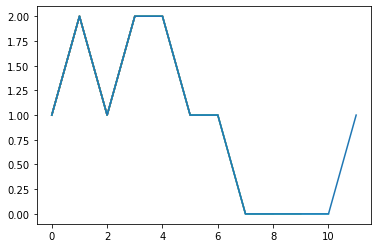

In [16]:
memory_actions = []
epsilon = 1
batch_size = 64
episodes = []
for i in range(2000):
    total_reward = 0
    obs = env.reset().reshape(1,-1)
    # the action the model takes is the output with the highest value
    action = np.argmax(target_model.predict(obs))
    done = False
    while not done:
        lastobs = obs
        obs, reward, done, info = env.step(action)
        total_reward += reward
        obs = obs.reshape(1,-1)
        if random.random() > epsilon:
            action = np.argmax(target_model.predict(obs))
        else:
            action = env.action_space.sample()
        step = [lastobs,action,reward,obs]
        memory_actions.append(step)
        
        
        if len(memory_actions) > 1000:
            print("training " +str(epsilon))
            # do training once we've sampled enough actions
            batch = np.asarray(random.sample(memory_actions,batch_size))
            current_states = np.concatenate([i[0] for i in batch])
            cur_q_vals = target_model.predict(current_states)
            next_states = np.concatenate([i[3] for i in batch])
            rewards = np.array([i[2] for i in batch])
            actions = to_categorical(np.array([i[1] for i in batch]),num_classes=NUM_ACTIONS)
            future_q_vals = target_model.predict(next_states)
            maxfuture_q = np.amax(future_q_vals,axis=1)
            updates = rewards + 0.999*maxfuture_q
            np.putmask(cur_q_vals,actions,updates.astype('float32',casting='same_kind'))
            target_model.fit(current_states,cur_q_vals,batch_size=batch_size)

    episodes.append(total_reward)
    epsilon*=0.99
    
    plt.plot([i for i in range(len(episodes))],episodes)
    if i % 20 == 0:
        plt.show()
           

In [11]:
actions.shape

(5, 3)

In [12]:
updates.shape

(5,)

In [15]:
cur_q_vals.shape

(5, 4)

In [8]:
rewards

array([1., 1., 1., 1., 1.])

In [10]:
updates = np.asarray([69,69])

In [11]:
np.putmask(x,act,updates)

In [12]:
x

array([[69,  2],
       [ 3, 69]])

In [1]:

import numpy as np
import gym

from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

from rl.agents.dqn import DQNAgent
from rl.policy import BoltzmannQPolicy
from rl.memory import SequentialMemory


ENV_NAME = 'CartPole-v0'


# Get the environment and extract the number of actions.
env = gym.make(ENV_NAME)
np.random.seed(123)
env.seed(123)
nb_actions = env.action_space.n

# Next, we build a very simple model.
model = Sequential()
model.add(Flatten(input_shape=(1,) + env.observation_space.shape))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(16))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())

# Finally, we configure and compile our agent. You can use every built-in Keras optimizer and
# even the metrics!
memory = SequentialMemory(limit=50000, window_length=1)
policy = BoltzmannQPolicy()
dqn = DQNAgent(model=model, nb_actions=env.action_space.shape, memory=memory, nb_steps_warmup=10,
               target_model_update=1e-2, policy=policy)
dqn.compile(Adam(lr=1e-3), metrics=['mae'])

# Okay, now it's time to learn something! We visualize the training here for show, but this
# slows down training quite a lot. You can always safely abort the training prematurely using
# Ctrl + C.
dqn.fit(env, nb_steps=50000, visualize=True, verbose=2)

# After training is done, we save the final weights.
dqn.save_weights('dqn_{}_weights.h5f'.format(ENV_NAME), overwrite=True)

# Finally, evaluate our algorithm for 5 episodes.
dqn.test(env, nb_episodes=5, visualize=True)

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 4)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                80        
_________________________________________________________________
activation_1 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                272       
_________________________________________________________________
activation_3 (Activation)    (None, 16)               

TypeError: len is not well defined for symbolic Tensors. (activation_4/Identity:0) Please call `x.shape` rather than `len(x)` for shape information.